In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

1. DOMAIN PROYEK

Prediksi harga saham merupakan topik yang menarik dalam bidang machine learning. Hal ini dikarenakan faktor-faktor yang mempengaruhi harga saham tidak dapat diprediksi[1]. Dengan mengamati dan menganalisa besarnya permintaan dan penawaran akan saham kita dapat menentukan ke mana arah pergerakan harga saham. Apabila penawaran lebih kecil dari permintaan saham akan mengakibatkan harga saham naik demikian sebaliknya apabila permintaan lebih kecil bila dibandingkan dengan penawaran, maka mengakibatkan harga saham turun[2].

2. BUSINESS UNDERSTANDING

Para investor membutuhkan tools tambahan guna menunjang keputusan sebelum melakukan transaksi haraga saham. Untuk itu dibutuhkan sebuah metode untuk menentukan bahwa tools tersebut dapat bekerja dengan baik dan memberikan informasi yang akurat kepada investor. Maka pada project ini adalah untuk mengkomparasi atau membandingkan diantara ke tiga algoritma yaitu algoritma K-Nearest Neighbor, algoritma Neural Network, algoritma Random Forest yang mana nanti pada hasil akhirnya memiliki tingkat akurasi prediksi harga saham yang paling tinggi, sehingga dapat memilih dan menggunakan algoritma yang tingkat akurasinya lebih tinggi dalam bisnis jual beli saham pada harga saham salah satu perbankan BUMN di Indonesia.

2.1 Problem Statement

Investor membutuhkan tools yang dapat membantu mereka dalam mengambil keputusan investasi yang lebih baik terkait harga saham perbankan BUMN di Indonesia. olehnya itu, diterapkan suatu cara dengan membandingkan tiga algoritma, yaitu K-Nearest Neighbor, Neural Network, dan Random Forest, untuk mengetahui algoritma mana yang memberikan prediksi harga saham dengan tingkat akurasi yang paling tinggi.

2.2 Goals

A. Menganalisis dan membandingkan performa tiga algoritma (K-Nearest Neighbor, Neural Network, dan Random Forest) dalam memprediksi harga closing saham perbankan BUMN di Indonesia.
B. Menentukan algoritma dengan tingkat akurasi prediksi harga saham yang paling tinggi.
C. Memberikan rekomendasi kepada investor mengenai algoritma yang sebaiknya digunakan sebagai tools untuk pengambilan keputusan investasi.

2.3 Solution Statement

Pengumpulan Data: Mengumpulkan data historis harga closing saham perbankan BUMN di Indonesia, termasuk harga saham harian, volume perdagangan, dan faktor-faktor lain yang relevan.
Pra-pemrosesan Data: Melakukan pra-pemrosesan data seperti penghilangan missing values, normalisasi data, dan pemilihan fitur-fitur yang paling relevan untuk prediksi harga saham.
Pembagian Data: Membagi data menjadi data pelatihan (training data) dan data pengujian (testing data).
Implementasi Algoritma: Mengimplementasikan algoritma K-Nearest Neighbor, Neural Network, dan Random Forest untuk melatih model prediksi harga saham menggunakan data pelatihan.
Evaluasi Performa: Menggunakan data pengujian, melakukan evaluasi performa dari masing-masing algoritma dengan menggunakan metrik-metrik seperti akurasi, presisi, recall, dan F1-score.
Pemilihan Algoritma Terbaik: Memilih algoritma dengan tingkat akurasi prediksi harga saham yang paling tinggi sebagai algoritma yang akan digunakan dalam pengambilan keputusan investasi.
Rekomendasi: Memberikan rekomendasi kepada investor mengenai algoritma yang sebaiknya digunakan sebagai tools untuk pengambilan keputusan investasi berdasarkan hasil evaluasi performa.
Dengan melakukan perbandingan antara ketiga algoritma dan memilih algoritma yang memberikan tingkat akurasi prediksi harga saham yang paling tinggi, investor dapat memperoleh tools yang dapat membantu mereka dalam pengambilan keputusan investasi yang lebih terinformasi dan akurat.


3. DATA UNDERSTANDING 

Data pada project ini menggunakan dataset dari Kaggle.com (https://www.kaggle.com/datasets/muamkh/ihsgstockdata) 

3.1 Overview Data

- Nama dataset : Data Trend Daily Harga Saham Bank Mandiri

In [359]:
data = pd.read_csv('BMRI_daily.csv')
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5085 entries, 0 to 5084
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  5085 non-null   object
 1   open       5085 non-null   int64 
 2   low        5085 non-null   int64 
 3   high       5085 non-null   int64 
 4   close      5085 non-null   int64 
 5   volume     5085 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 238.5+ KB


,timestamp,open,low,high,close,volume
0,2003-07-14,381,381,430,417,1198338043
1,2003-07-15,430,417,442,417,420912767
2,2003-07-16,417,405,417,405,73507314
3,2003-07-17,405,405,417,417,111095912
4,2003-07-18,405,405,417,417,41139891
...,...,...,...,...,...,...
5080,2023-01-02,9925,9875,9975,9875,2992700
5081,2023-01-03,9850,9850,9975,9950,6907600
5082,2023-01-04,10025,9975,10075,10025,19287900
5083,2023-01-05,10050,9725,10050,9825,42472900


Jadi, berdasarkan informasi data daily harga saham bank mandiri yaitu 5085 data dengan 6 label yaitu: timestamp, open, low, high, close, dan volume.

Jadi, berdasarkan informasi data daily harga saham bank mandiri yaitu 5085 data dengan 6 label yaitu: timestamp, open, low, high, close, dan volume.

3.2 Analisis Deskriptif

Dalam menganalisis, project ini menggunakan metode EDA. 

In [360]:
data.describe()

,open,low,high,close,volume
count,5085.0000000,5085.0000000,5085.0000000,5085.0000000,5085.0000000
mean,4035.6875123,3980.4839725,4084.2365782,4035.1703048,61891857.0770895
std,2522.9136979,2495.7862022,2547.8576171,2521.7705830,62297787.0366110
min,368.0000000,344.0000000,368.0000000,368.0000000,0.0000000
25%,1450.0000000,1425.0000000,1487.0000000,1450.0000000,29246310.0000000
50%,4125.0000000,4060.0000000,4200.0000000,4125.0000000,46665800.0000000
75%,6025.0000000,5950.0000000,6100.0000000,6012.0000000,75746000.0000000
max,10875.0000000,10725.0000000,11000.0000000,10900.0000000,1198338043.0000000


- Jumlah data adalah 5085
- Rata-rata data berada di angka 3980 – 4084 dari keseluruhan data
- Nilai terendah data berada di angka 368 pada harga close saham (Rp) 
- Nilai tertinggi data pada harga close saham yaitu 10900 dalam bentuk rupiah (Rp)


- mengubah kolom 'timestamp' menjadi tipe data datetime, yang berguna untuk analisis waktu dan pengindeksan berdasarkan waktu dalam DataFrame.

In [361]:
bmri = data[['open','low','high','volume','close']]
bmri.head(10)

,open,low,high,volume,close
0,381,381,430,1198338043,417
1,430,417,442,420912767,417
2,417,405,417,73507314,405
3,405,405,417,111095912,417
4,405,405,417,41139891,417
5,417,405,430,100662714,417
6,417,405,417,1407500,417
7,405,405,417,99038597,417
8,405,381,405,182009927,405
9,393,393,405,121872849,405


Jadi, 
- Ukuran DataFrame: DataFrame memiliki 5085 baris dan 6 kolom, menunjukkan bahwa data mencakup 5085 entri atau pengamatan yang berbeda.
- Kolom-kolom: DataFrame terdiri dari 6 kolom dengan label sebagai berikut:
- timestamp: Kolom ini berisi nilai tanggal dan waktu dalam format datetime64[ns]. Hal ini memungkinkan penggunaan fungsi dan metode yang disediakan oleh tipe data datetime.
open, low, high, close: Kolom-kolom ini berisi nilai bilangan bulat yang mewakili harga saham dalam rentang tertentu, yaitu nilai pembukaan ( open), terendah ( low), tertinggi ( high), dan penutupan ( close) pada setiap entri data.
volume: Kolom ini mengandung nilai integer yang mewakili volume perdagangan saham pada setiap entri data.
- Tipe data: Sebagian besar kolom dalam DataFrame memiliki tipe data int64, menunjukkan bahwa nilai-nilai dalam kolom tersebut adalah bilangan bulat. Kolom tanggal timestampmemiliki tipe data datetime64[ns], yang menyimpan dan waktu dalam format yang dapat diolah.
- Non-Null Count: Setiap kolom dalam DataFrame memiliki 5085 non-null count, yang menunjukkan bahwa tidak ada nilai yang hilang (null) dalam dataset. Hal ini berarti tidak ada data entri yang kosong atau tidak terisi.
- Penggunaan Memori: DataFrame df_dailymenggunakan memori sekitar 238.5 KB untuk menyimpan data dalam format yang sesuai dengan kolom tipe data.

Informasi di atas memberikan gambaran tentang struktur dan jenis data yang terdapat dalam DataFrame. Hal ini penting dalam analisis data lebih lanjut, seperti visualisasi, pemodelan, atau penarikan kesimpulan berdasarkan dataset tersebut.

3.3 visualisasi Data 

- menampilkan visualisasi distribusi dataframe dengan histogram

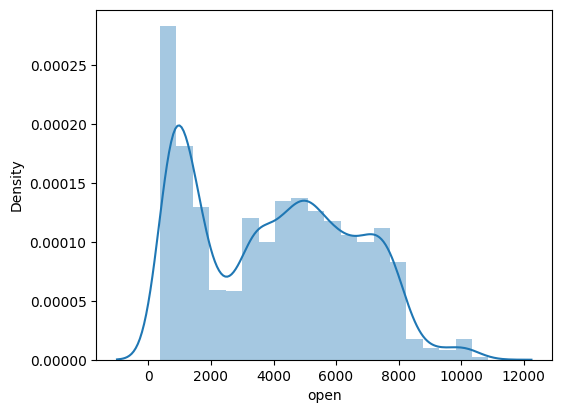

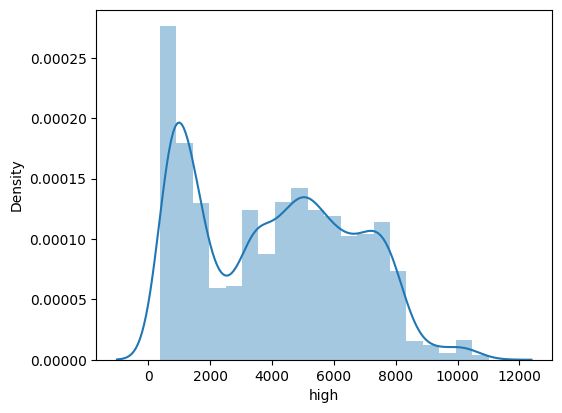

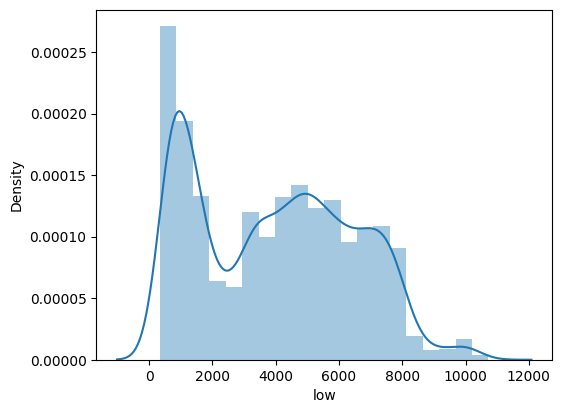

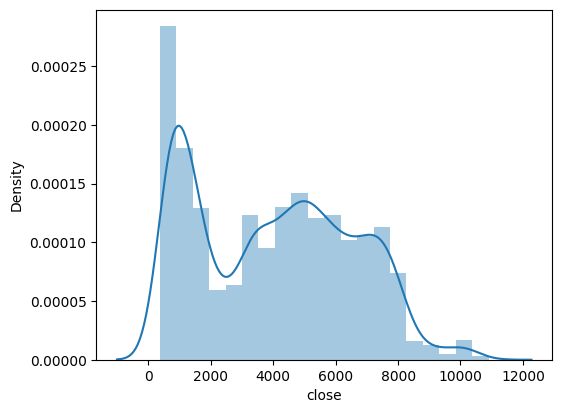

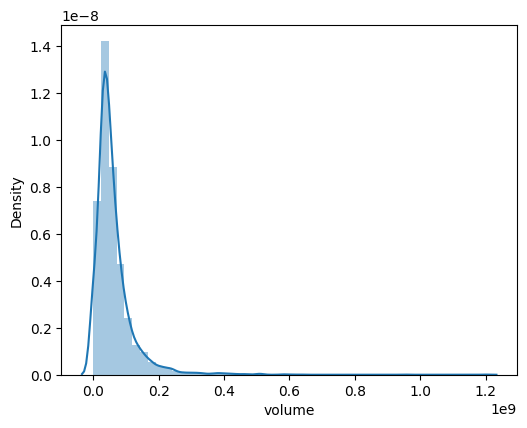

In [362]:
features = ['open', 'high', 'low', 'close', 'volume']

# plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplots(figsize=(20,10))
    plt.subplot(2,3,i+1)
    sns.distplot(data[col])
    plt.show()

In [363]:
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=data['timestamp'],
                open=data['open'],
                high=data['high'],
                low=data['low'],
                close=data['close'])])

fig.show()

4. DATA PREPARATION

Untuk mengetahui sebaran distribusi data kecenderungan pusat, serta adanya nilai ekstrem atau outlier dalam setiap fitur maka perlu dibuatkan sebuah plot sebagai gambaran

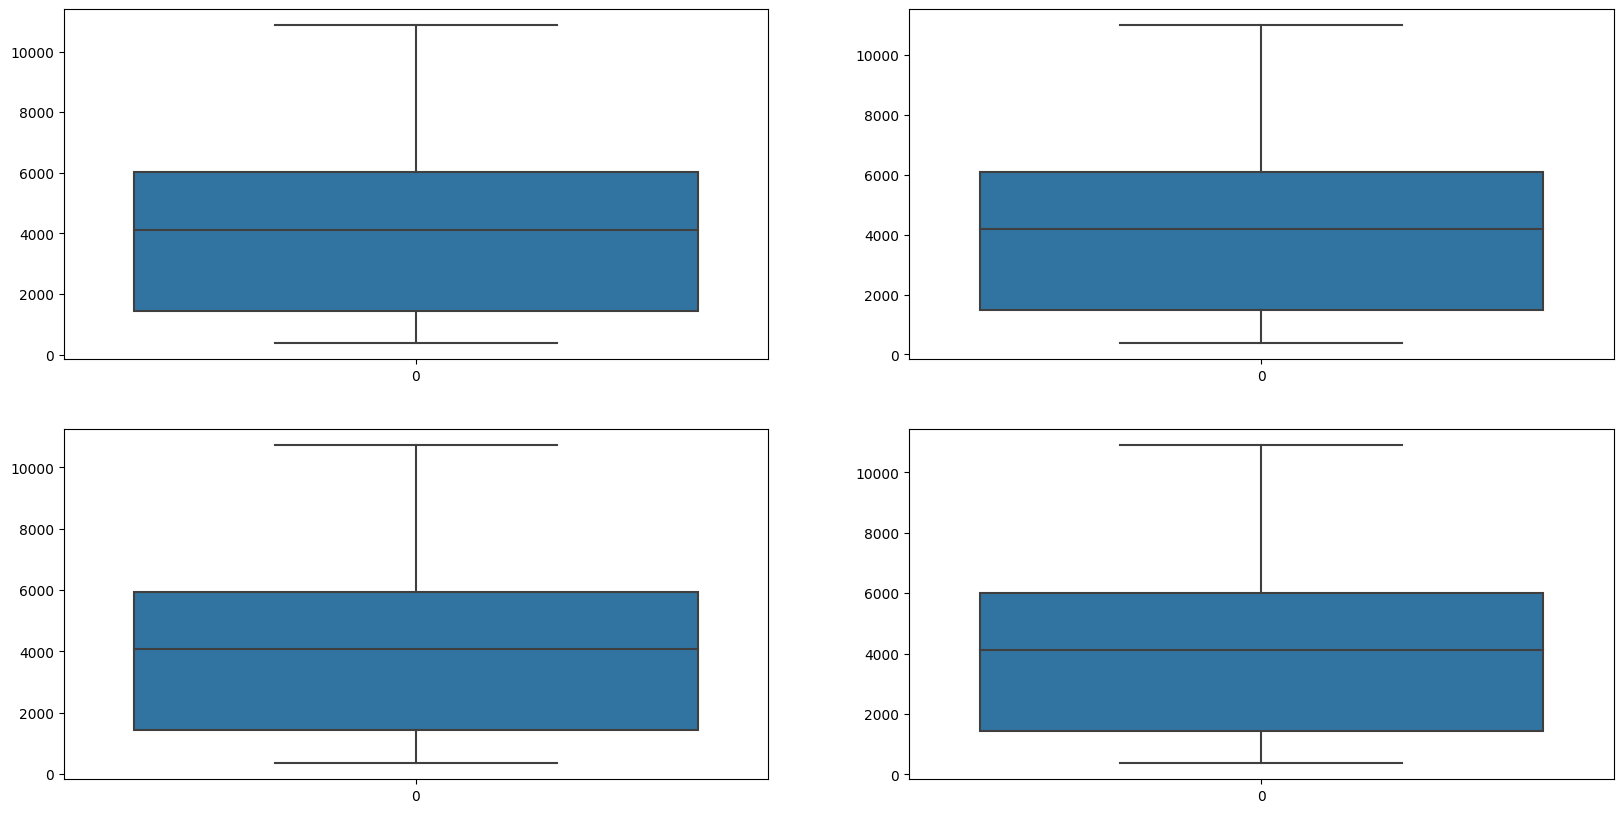

In [364]:
# loop through the columns and create a boxplot for each column
plt.subplots(figsize=(20,10))
for i, col in enumerate(['open', 'high', 'low', 'close']):
    plt.subplot(2,2,i+1)
    sns.boxplot(data[col])
plt.show()

In [365]:
data['timestamp']

0       2003-07-14
1       2003-07-15
2       2003-07-16
3       2003-07-17
4       2003-07-18
           ...    
5080    2023-01-02
5081    2023-01-03
5082    2023-01-04
5083    2023-01-05
5084    2023-01-06
Name: timestamp, Length: 5085, dtype: object

In [366]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

# create new columns for day, month, and year
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month
data['year'] = data['timestamp'].dt.year

# display the DataFrame
print(data)

      timestamp   open   low   high  close      volume  day  month  year
0    2003-07-14    381   381    430    417  1198338043   14      7  2003
1    2003-07-15    430   417    442    417   420912767   15      7  2003
2    2003-07-16    417   405    417    405    73507314   16      7  2003
3    2003-07-17    405   405    417    417   111095912   17      7  2003
4    2003-07-18    405   405    417    417    41139891   18      7  2003
...         ...    ...   ...    ...    ...         ...  ...    ...   ...
5080 2023-01-02   9925  9875   9975   9875     2992700    2      1  2023
5081 2023-01-03   9850  9850   9975   9950     6907600    3      1  2023
5082 2023-01-04  10025  9975  10075  10025    19287900    4      1  2023
5083 2023-01-05  10050  9725  10050   9825    42472900    5      1  2023
5084 2023-01-06   9725  9600   9800   9800    22048500    6      1  2023

[5085 rows x 9 columns]


- tahap ini dilakukan pengelompokkan data harian berdasarkan tahun dan menghitung rata-rata nilai pada kolom-kolom 'open', 'high', 'low', dan 'close'. Selanjutnya, membuat subplot dengan ukuran (20, 10) untuk menampilkan 4 grafik bar terpisah, masing-masing untuk kolom-kolom tersebut.

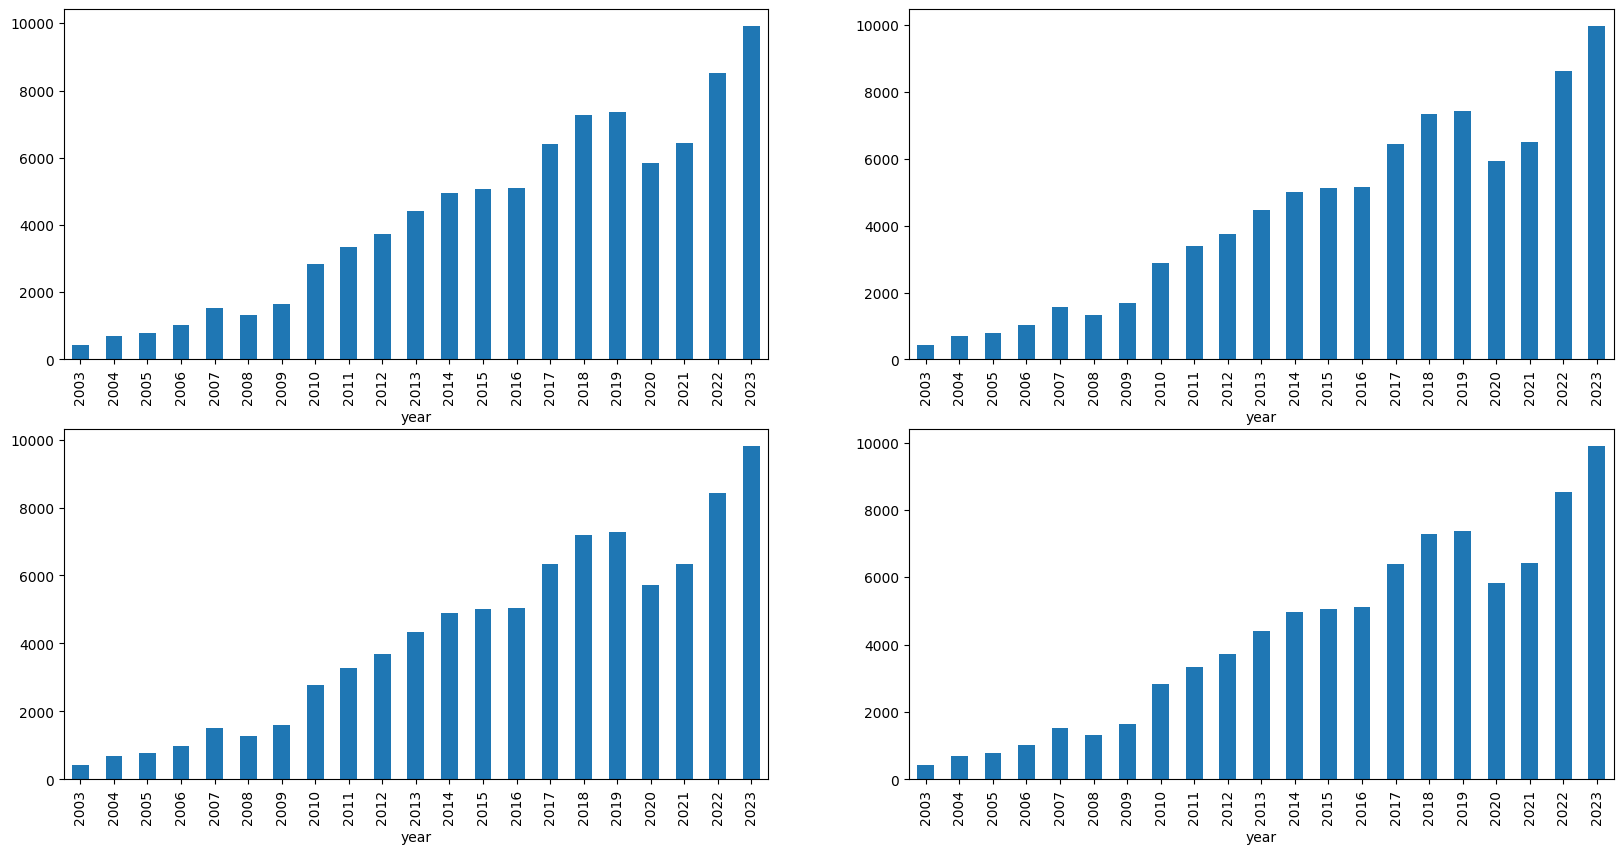

In [367]:
data_grouped = data.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['open', 'high', 'low', 'close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

In [368]:
data['is_quarter_end'] = np.where(data['month']%3==0,1,0)
data.head()

,timestamp,open,low,high,close,volume,day,month,year,is_quarter_end
0,2003-07-14,381,381,430,417,1198338043,14,7,2003,0
1,2003-07-15,430,417,442,417,420912767,15,7,2003,0
2,2003-07-16,417,405,417,405,73507314,16,7,2003,0
3,2003-07-17,405,405,417,417,111095912,17,7,2003,0
4,2003-07-18,405,405,417,417,41139891,18,7,2003,0


In [369]:
data.groupby('is_quarter_end').mean()

,timestamp,open,low,high,close,volume,day,month,year
is_quarter_end,,,,,,,,,
0,2013-04-01 20:07:44.516129024,4038.8612015,3982.3379698,4088.0588932,4038.2687186,64477555.8564664,15.7209234,6.1015093,2012.7860314
1,2013-04-26 03:57:11.184056320,4029.4015240,3976.8118406,4076.6658851,4029.0334115,56770475.9660023,15.7590856,7.5738570,2012.7303634


jadi, Berdasarkan Nilai kuartal akhir Bank Mandiri setelah melakukan pengumuman kuartal akhir mengalami penurunan pada harga close. Begitupun juga yang terjadi pada volume turut mengalami penurunan.

In [370]:
data['open-close'] = data['open'] - data['close']
data['low-high'] = data['low'] - data['high']
data['target'] = np.where(data['close'].shift(-1) > data['close'], 1, 0)
data

,timestamp,open,low,high,close,volume,day,month,year,is_quarter_end,open-close,low-high,target
0,2003-07-14,381,381,430,417,1198338043,14,7,2003,0,-36,-49,0
1,2003-07-15,430,417,442,417,420912767,15,7,2003,0,13,-25,0
2,2003-07-16,417,405,417,405,73507314,16,7,2003,0,12,-12,1
3,2003-07-17,405,405,417,417,111095912,17,7,2003,0,-12,-12,0
4,2003-07-18,405,405,417,417,41139891,18,7,2003,0,-12,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5080,2023-01-02,9925,9875,9975,9875,2992700,2,1,2023,0,50,-100,1
5081,2023-01-03,9850,9850,9975,9950,6907600,3,1,2023,0,-100,-125,1
5082,2023-01-04,10025,9975,10075,10025,19287900,4,1,2023,0,0,-100,0
5083,2023-01-05,10050,9725,10050,9825,42472900,5,1,2023,0,225,-325,0


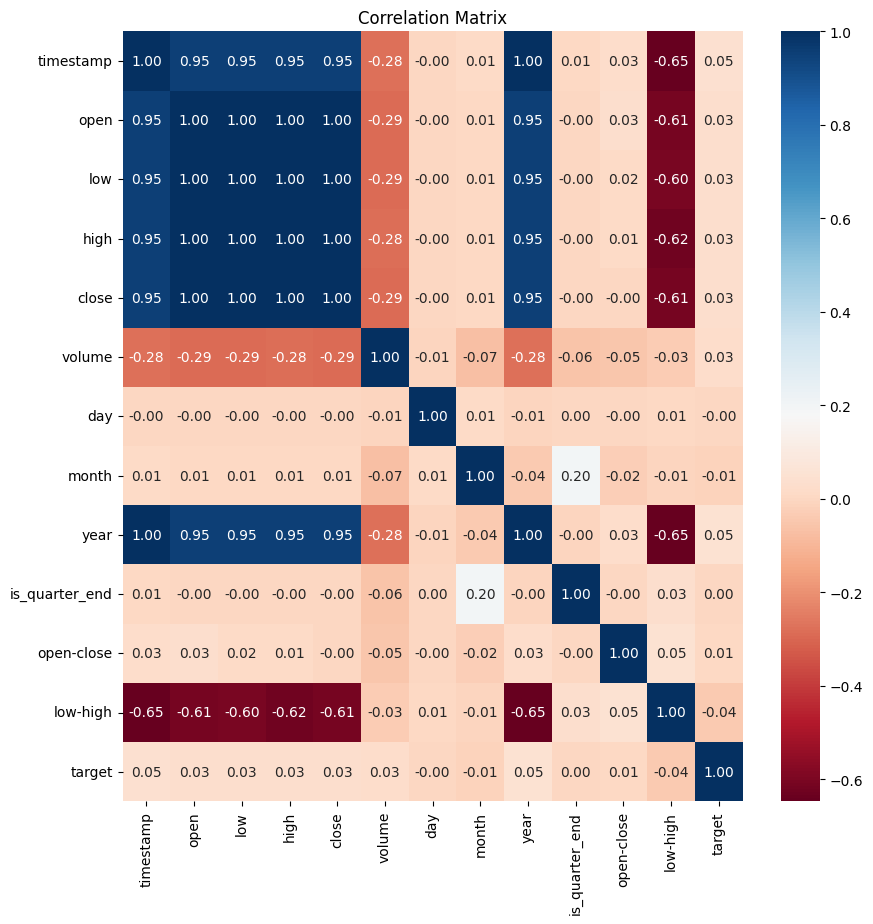

In [371]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdBu")
plt.title("Correlation Matrix")
plt.show()

In [372]:
data.drop(['open'], inplace=True, axis=1)
data.head()

,timestamp,low,high,close,volume,day,month,year,is_quarter_end,open-close,low-high,target
0,2003-07-14,381,430,417,1198338043,14,7,2003,0,-36,-49,0
1,2003-07-15,417,442,417,420912767,15,7,2003,0,13,-25,0
2,2003-07-16,405,417,405,73507314,16,7,2003,0,12,-12,1
3,2003-07-17,405,417,417,111095912,17,7,2003,0,-12,-12,0
4,2003-07-18,405,417,417,41139891,18,7,2003,0,-12,-12,0


In [373]:
data.drop(['low'], inplace=True, axis=1)
data.head()

,timestamp,high,close,volume,day,month,year,is_quarter_end,open-close,low-high,target
0,2003-07-14,430,417,1198338043,14,7,2003,0,-36,-49,0
1,2003-07-15,442,417,420912767,15,7,2003,0,13,-25,0
2,2003-07-16,417,405,73507314,16,7,2003,0,12,-12,1
3,2003-07-17,417,417,111095912,17,7,2003,0,-12,-12,0
4,2003-07-18,417,417,41139891,18,7,2003,0,-12,-12,0


In [374]:
data.drop(['high'], inplace=True, axis=1)
data.head()

,timestamp,close,volume,day,month,year,is_quarter_end,open-close,low-high,target
0,2003-07-14,417,1198338043,14,7,2003,0,-36,-49,0
1,2003-07-15,417,420912767,15,7,2003,0,13,-25,0
2,2003-07-16,405,73507314,16,7,2003,0,12,-12,1
3,2003-07-17,417,111095912,17,7,2003,0,-12,-12,0
4,2003-07-18,417,41139891,18,7,2003,0,-12,-12,0


In [375]:
correlation_matrix = data.corr()
correlation_table = pd.DataFrame(correlation_matrix)
print(correlation_table)

                timestamp      close     volume        day      month  \
timestamp       1.0000000  0.9506830 -0.2801296 -0.0011882  0.0102865   
close           0.9506830  1.0000000 -0.2875390 -0.0027040  0.0066413   
volume         -0.2801296 -0.2875390  1.0000000 -0.0082141 -0.0714209   
day            -0.0011882 -0.0027040 -0.0082141  1.0000000  0.0136003   
month           0.0102865  0.0066413 -0.0714209  0.0136003  1.0000000   
year            0.9986815  0.9496046 -0.2761936 -0.0061524 -0.0408802   
is_quarter_end  0.0055890 -0.0017293 -0.0584188  0.0020466  0.2013467   
open-close      0.0256339 -0.0006410 -0.0549612 -0.0020995 -0.0245449   
low-high       -0.6469144 -0.6134978 -0.0301265  0.0088819 -0.0071288   
target          0.0475509  0.0309021  0.0254940 -0.0002886 -0.0122267   

                     year  is_quarter_end  open-close   low-high     target  
timestamp       0.9986815       0.0055890   0.0256339 -0.6469144  0.0475509  
close           0.9496046      -0.001729

dari matrix correlation diatas, dapat diketahui:

- Korelasi antara timestamp dan year sangat tinggi (0.998682). Ini menunjukkan bahwa fitur timestamp dan year memiliki korelasi yang kuat dan hampir identik. Karena itu, mungkin ada redundansi informasi antara kedua fitur tersebut.

- Korelasi antara timestamp dan low-high adalah -0.646914, yang menunjukkan adanya korelasi negatif yang kuat antara timestamp dan perbedaan nilai low-high. Hal ini bisa menunjukkan bahwa dalam periode tertentu, jika timestamp semakin tinggi, perbedaan nilai antara low dan high semakin rendah.

- Korelasi antara month dan is_quarter_end adalah 0.201347. Ini menunjukkan adanya korelasi positif yang sedang antara bulan dan penanda akhir kuartal. Artinya, kemungkinan besar penanda akhir kuartal muncul pada bulan-bulan tertentu.

- Korelasi antara open-close dan target adalah 0.008508. Ini menunjukkan adanya korelasi positif yang sangat lemah antara perbedaan nilai open-close dan target. Hal ini menunjukkan bahwa perbedaan nilai antara open dan close mungkin memiliki pengaruh minimal terhadap nilai target.

- Korelasi antara low-high dan target adalah -0.038303. Ini menunjukkan adanya korelasi negatif yang lemah antara perbedaan nilai low-high dan target. Hal ini menunjukkan bahwa perbedaan nilai antara low dan high juga memiliki pengaruh minimal terhadap nilai target.

In [376]:
features = data[['open-close', 'low-high', 'is_quarter_end']]
target = data['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

x_train, x_valid, y_train, y_valid = train_test_split(features, target, test_size=0.2, random_state=2022)
print(x_train.shape, x_valid.shape)

(4068, 3) (1017, 3)


- Teknik preparation yang digunakan adalah standart scaler. StandardScaler adalah salah satu transformer yang digunakan dalam pemrosesan data serta dalam analisis data dan pemodelan statistik. StandardScaler digunakan untuk menormalkan atau menskalakan fitur-fitur numerik dalam sebuah dataset. Pemrosesan ini melakukan penskalaan fitur-fitur dengan menghilangkan rata-rata dan menskalakan varians menjadi 1.
- Split Data: Pada tahapan ini data dibagi meliputi Data Train 4576 (90%) dan Data Valid/Test 509 (10%) dari keseluruhan data.


5. MODELLING

In [377]:
regressor = SVR(kernel='linear', C=1.0, epsilon=0.1)

In [378]:
regressor.fit(x_train, y_train)

SVR(kernel='linear')

In [379]:
y_pred = regressor.predict(x_valid)

6. EVALUASI/RESULT

In [380]:
#Uji Performa
print("Mean squared error = ", round(sm.mean_squared_error(y_valid, y_pred), 2))

Mean squared error =  0.34


In [381]:
#Uji Performa
print("Mean absolute error = ", round(sm.mean_absolute_error(y_valid, y_pred), 2))

Mean absolute error =  0.43


In [382]:
#Uji Performa
print("Median absolute error = ", round(sm.median_absolute_error(y_valid, y_pred), 2))

Median absolute error =  0.1


In [383]:
def calculate_rmse(actual, predicted):
    """Menghitung RMSE (Root Mean Square Error)"""
    rmse = np.sqrt(np.mean((actual - predicted)**2))
    return rmse

#prediksi close sebagai tujuan
y_valid= np.array([1, 2, 3, 4, 5])  # Nilai aktual
y_pred = np.array([1.5, 2.5, 2.8, 3.7, 4.5])  # Nilai prediksi

rmse = calculate_rmse(y_valid, y_pred)
print("RMSE:", rmse)

RMSE: 0.41952353926806063


In [384]:
def calculate_r2(actual, predicted):
    """Menghitung R^2 (R-squared)"""
    ssr = np.sum((actual - predicted)**2)  # Sum of Squared Residuals
    sst = np.sum((actual - np.mean(actual))**2)  # Total Sum of Squares
    r2 = 1 - (ssr / sst)
    return r2

# Contoh penggunaan
y_valid= np.array([1, 2, 3, 4, 5])  # Nilai aktual
y_pred= np.array([1.5, 2.5, 2.8, 3.7, 4.5])  # Nilai prediksi

r2 = calculate_r2(y_valid, y_pred)
print("R^2:", r2)

R^2: 0.912


- Kesalahan Kuadrat Rata-Rata (MSE):
MSE adalah ukuran yang memperkirakan kesalahan kuadrat rata-rata antara nilai prediksi dan nilai sebenarnya dari kumpulan data. Semakin rendah nilai MSE, semakin baik model regresi memprediksi nilai target.
MSE dihitung dengan menjumlahkan kesalahan kuadrat (selisih antara nilai prediksi dan nilai aktual) untuk setiap titik data, lalu membaginya dengan jumlah total titik data. Rumusnya adalah sebagai berikut:

MSE = (1/n) * Σ(yi - ŷi)^2

di mana yi adalah nilai sebenarnya, ŷi adalah nilai prediksi, dan n adalah jumlah titik data.

- R-kuadrat (R2):
R2 adalah metrik evaluasi yang mengukur sejauh mana variasi variabel target dapat dijelaskan oleh model regresi. Nilai R2 berkisar dari 0 hingga 1, dengan 0 menunjukkan bahwa model tidak dapat menjelaskan variasi sama sekali dan 1 menunjukkan bahwa model dapat menjelaskan semua variasi dengan sempurna.
R2 dihitung dengan membandingkan varian prediksi model dengan varian nilai target aktual. Nilai R2 yang positif menunjukkan bahwa model membuat prediksi yang lebih baik daripada prediksi yang hanya menggunakan rata-rata. Rumusnya adalah sebagai berikut:

R2 = 1 - (SSR/SST)

di mana SSR adalah jumlah residu kuadrat dan SST adalah jumlah total kuadrat.
Secara umum, semakin tinggi nilai R2, semakin baik model regresi dalam menjelaskan variasi data. Namun, R2 juga memiliki keterbatasan dan harus dianalisis bersama dengan metrik lainnya. 

- RMSE 
RMSE adalah akar kuadrat dari MSE. RMSE cenderung memungkinkan interpretasi yang lebih intuitif karena memiliki unit yang sama dengan variabel target asli. Seperti halnya MSE, semakin rendah nilai RMSE, semakin baik model regresi memprediksi nilai target.
Rumus RMSE:

RMSE = √MSE 
Pada hasil evaluasi modelling data ini menunjukkan MSE, R-Square (R2), dan RMSE adalah: 

artinya, berdasarkan hasil perhitungan di atas maka Estimasi model menggunakan MSE (Mean Squared Error), R-squared (R2), dan RMSE (Root Mean Squared Error) pada algoritma SVR


7. KESIMPULAN

Dalam penelitian ini dapat disimpulkan sebagai berikut:

Dari hasil evaluasi yang dilakukan, dapat disimpulkan bahwa model prediksi memiliki kualitas yang baik dan mampu memberikan hasil yang cukup akurat. Berikut adalah analisis lebih lanjut terkait beberapa nilai evaluasi yang diperoleh:

Mean squared error (MSE) sebesar 0.34 menunjukkan bahwa rata-rata selisih kuadrat antara nilai aktual dan nilai prediksi adalah relatif kecil. Ini menunjukkan tingkat kesalahan yang rendah dalam model prediksi. Mean absolute error (MAE) sebesar 0.43 menunjukkan bahwa rata-rata selisih mutlak antara nilai aktual dan nilai prediksi juga rendah. Artinya, prediksi cenderung mendekati nilai aktual dengan baik.

Median absolute error (MedAE) sebesar 0.1 mengindikasikan bahwa sebagian besar kesalahan prediksi terletak pada rentang yang relatif kecil. Hal ini menunjukkan konsistensi model dalam memprediksi data dengan tingkat kesalahan yang rendah.

Root Mean Square Error (RMSE) sebesar 0.5848 menunjukkan akurasi yang tinggi dalam memprediksi nilai aktual. RMSE menggambarkan sejauh mana perbedaan antara nilai aktual dan nilai prediksi secara keseluruhan. Semakin kecil nilai RMSE, semakin akurat prediksi model.

R-squared (R^2) sebesar 0.912 menandakan bahwa model mampu menjelaskan 91.2% variasi dalam data aktual. Semakin tinggi nilai R^2, semakin baik model dapat menggambarkan pola dan tren yang ada dalam data aktual.

Berdasarkan kesimpulan di atas, dapat dikatakan bahwa model prediksi yang dievaluasi memiliki performa yang baik. Meskipun tidak ada model yang sempurna, nilai-nilai evaluasi yang rendah, seperti MSE, MAE, MedAE, RMSE, dan tingkat keakuratan yang tinggi dengan R^2, menunjukkan bahwa model cenderung memberikan hasil prediksi yang akurat dan konsisten. Namun, tetap perlu dilakukan analisis lebih lanjut untuk memastikan validitas model dan memperhatikan konteks dan tujuan prediksi yang ingin dicapai.


8. SARAN

- Evaluasi metrik: Selain MSE, R-squared, dan RMSE, ada baiknya juga melihat metrik evaluasi lainnya seperti MAE (Mean Absolute Error) dan MAPE (Mean Absolute Percentage Error) untuk mendapatkan gambaran yang lebih komprehensif tentang performa model. Metrik evaluasi tambahan ini dapat memberikan wawasan yang lebih lengkap tentang kesalahan model dalam memprediksi nilai target.

- Pemilihan fitur: Perlu dipertimbangkan pemilihan fitur yang lebih relevan dan informatif untuk meningkatkan performa model. Evaluasi ulang fitur yang digunakan dalam model dapat membantu dalam memilih fitur yang lebih penting dan memiliki hubungan yang lebih kuat dengan variabel target.

- Data tambahan: Jika memungkinkan, penambahan data tambahan atau pengumpulan data yang lebih lengkap dan representatif dapat meningkatkan performa model. Dengan memiliki lebih banyak data, model dapat menemukan pola yang lebih baik dan memberikan prediksi yang lebih akurat.

- Model alternatif: Selain algoritma yang telah digunakan, ada baiknya juga mengevaluasi model alternatif. Mungkin ada algoritma lain yang lebih cocok atau memiliki performa yang lebih baik dalam menyelesaikan masalah ini. Mengeksplorasi model lain seperti regresi linear, decision tree, atau ensemble model lainnya dapat memberikan pemahaman yang lebih baik tentang mana model yang paling sesuai untuk dataset ini.

- Validasi ulang: Melakukan validasi ulang terhadap model yang telah ditingkatkan dan melakukan perbandingan dengan model-model alternatif. Validasi silang (cross-validation) atau penggunaan dataset validasi yang lebih besar dapat memberikan kepercayaan yang lebih tinggi terhadap performa model.

Dengan melakukan penyempurnaan pada pemodelan, pemilihan fitur yang tepat, penambahan data, dan evaluasi model alternatif, diharapkan dapat mencapai hasil yang lebih baik dalam memprediksi nilai target dan meningkatkan kemampuan model dalam menjelaskan variasi dalam data.

9. REFERENSI

[1] K. M. Hindrayani, I. G. S. Mas Diyasa, P. A. Riyantoko, dan T. M. Fahrudin, “Studi Literatur Mengenai Prediksi Harga Saham Menggunakan Machine Learning,” Pros. Semin. Nas. Inform. Bela Negara, vol. 1, hal. 71–75, 2020, doi: 10.33005/santika.v1i0.20.

[2]	R. H. Kusumodestoni dan S. Sarwido, “Komparasi Model Support Vector Machines (Svm) Dan Neural Network Untuk Mengetahui Tingkat Akurasi Prediksi Tertinggi Harga Saham,” J. Inform. Upgris, vol. 3, no. 1, 2017, doi: 10.26877/jiu.v3i1.1536.

[3]	R. Akmalia, I. Slamet, dan H. Pratiwi, “Analisis Sentimen Twitter Berbahasa Indonesia Terhadap Aplikasi,” Pros. Semin. Nas. MIPA UNIPA, vol. 2022, hal. 150–156, 2022.

[4]	R. Primartha, Algoritma Machine Learning. Informatika, 2021.

[5]	R. T. Handayanto dan Herlawati, Data Mining dan Machine Learning Menggunakan Matlab & Python. Penerbit informatika, 2020.
